<ipython-input-1-25f7dbad90cd>:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


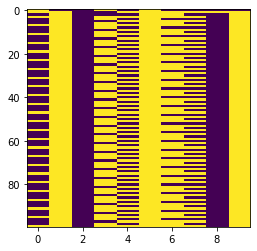

In [1]:
import sys
sys.path.insert(0, '../')
import networkx as nx, numpy as np
from matplotlib.pyplot import subplots
from PlexSim.Models import *
from PlexSim.Models.RBN import RBN
from PlexSim.Models.FastIsing import Ising
from PlexSim.Models.Potts import Potts
N = 10
k = 3
pn = k/N
graph = nx.random_regular_graph(k, N) 

# graph = nx.random_graphs.erdos_renyi_graph(10, .3)
m = RBN(graph = graph, updateType = 'async',\
            )
# print(m.rules)
m.reset()
# print(m.updateType, m.rules)
res = m.simulate(100)
fig, ax = subplots(figsize = (4,4))
ax.imshow(res, aspect = 'auto')
fig.show()

In [6]:
from Toolbox import infcy
nsamples = 1000
snapshots = infcy.getSnapShots(m, nsamples)

deltas = 20
repeats = 100
results = infcy.runMC(m, snapshots, deltas, repeats)
results_r = infcy.r

 25%|██▍       | 135/550 [00:00<00:00, 1335.88it/s]

done
Found 550 states
Delta =  0.34 sec
Decoding..
starting runs


100%|██████████| 550/550 [00:00<00:00, 1148.38it/s]
<ipython-input-6-4cd1b3224d19>:7: RuntimeWarning: divide by zero encountered in log2
  results = infcy.runMC(m, snapshots, deltas, repeats)
<ipython-input-6-4cd1b3224d19>:7: RuntimeWarning: invalid value encountered in multiply
  results = infcy.runMC(m, snapshots, deltas, repeats)


Delta =  0.50 sec


<ipython-input-7-f231c3877e33>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


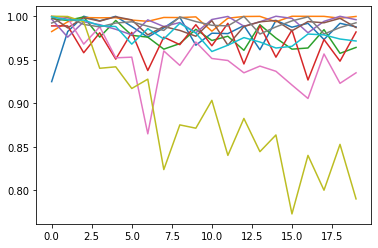

In [7]:
cpx, px, mi = results
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
ax.plot(mi)
fig.show()

In [14]:
from ipywidgets import interact, IntSlider
%matplotlib widget
fig, ax = subplots()
m.reset()
res = m.simulate(100)
h = ax.imshow(res[[0]])
slider = IntSlider(value = 0, min = 0, max = len(res))
@interact(idx = slider)
def update(idx):
    h.set_data(res[[idx]])
    fig.canvas.draw()
fig.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=0, description='idx'), Output()), _dom_classes=('widget-interact',))